# 1.0 Acquiring data and building datasets

## 1.1 Data Collection

### 1.1.1 Content

Most banks have a large customer base - with different characteristics in terms of age, income, values, lifestyle, and more. Customer segmentation is the process of dividing a customer dataset into specific groups based on shared traits.

According to a report from Ernst & Young, “A more granular understanding of consumers is no longer a nice-to-have item, but a strategic and competitive imperative for banking providers. Customer understanding should be a living, breathing part of everyday business, with insights underpinning the full range of banking operations."

### 1.1.2 Context

This case requires to develop a customer segmentation to give recommendations like saving plans, loans, wealth management, etc. on target customer groups.


### 1.1.3 Data Description

The sample dataset consists of 1 Million+ transaction by over 800K customers for a bank in India. The data contains information such as - customer age (DOB), location, gender, account balance at the time of the transaction, transaction details, transaction amount, etc.

### 1.1.4 Goal

Perform Clustering / Segmentation on the dataset and identify popular customer groups along with their definitions/rules

### 1.1.5 Data Source

Kaggle: [Customer demographics and transactions data from an Indian Bank](https://www.kaggle.com/shivamb/bank-customer-segmentation)

# 2.0 Preprocessing of data

## 2.1 Import Libraries

In [3]:
# Import libraries

# Data preprocessing
import pandas as pd    # dataframe manipulation
import numpy as np     # numerical python
import datetime as dt   # converting date formats
import seaborn as sns     # visuals
import matplotlib.pyplot as plt   # plots

import warnings
warnings.filterwarnings('ignore')   # ignore warnings

import os   # file system management
import gc   # memory management

In [4]:
# Setting styles 
pd.options.display.max_columns =200
pd.options.display.max_rows =30
pd.options.display.float_format = '{:,.2f}'.format

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (18, 8)

%config InlineBackend.figure_format = 'svg'

%matplotlib inline

## 2.2 Import Datasets

In [5]:
# Mounting the drive to access datasets
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Read files into pandas dataframe
path = 'drive/My Drive/Y4_T1/Machine Learning/Data/'

In [7]:
data = pd.read_csv(path + "/bank_transactions.csv", parse_dates=['CustomerDOB','TransactionDate'])

## 2.3 Preview Dataframes

In [8]:
data.head()

TransactionID CustomerID CustomerDOB CustGender CustLocation  \
0            T1   C5841053  1994-10-01          F   JAMSHEDPUR   
1            T2   C2142763  2057-04-04          M      JHAJJAR   
2            T3   C4417068  1996-11-26          F       MUMBAI   
3            T4   C5342380  1973-09-14          F       MUMBAI   
4            T5   C9031234  1988-03-24          F  NAVI MUMBAI   

   CustAccountBalance TransactionDate  TransactionTime  \
0           17,819.05      2016-02-08           143207   
1            2,270.69      2016-02-08           141858   
2           17,874.44      2016-02-08           142712   
3          866,503.21      2016-02-08           142714   
4            6,714.43      2016-02-08           181156   

   TransactionAmount (INR)  
0                    25.00  
1                27,999.00  
2                   459.00  
3                 2,060.00  
4                 1,762.50

In [9]:
data.tail()

TransactionID CustomerID CustomerDOB CustGender   CustLocation  \
1048562      T1048563   C8020229  1990-08-04          M      NEW DELHI   
1048563      T1048564   C6459278  1992-02-20          M         NASHIK   
1048564      T1048565   C6412354  1989-05-18          M      HYDERABAD   
1048565      T1048566   C6420483  1978-08-30          M  VISAKHAPATNAM   
1048566      T1048567   C8337524  1984-05-03          M           PUNE   

         CustAccountBalance TransactionDate  TransactionTime  \
1048562            7,635.19      2016-09-18           184824   
1048563           27,311.42      2016-09-18           183734   
1048564          221,757.06      2016-09-18           183313   
1048565           10,117.87      2016-09-18           184706   
1048566           75,734.42      2016-09-18           181222   

         TransactionAmount (INR)  
1048562                   799.00  
1048563                   460.00  
1048564                   770.00  
1048565                 1,000.00  
1048566                 1,166.00

In [10]:
data.columns

Index(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender',
       'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionTime', 'TransactionAmount (INR)'],
      dtype='object')

## 2.4 Exploratory Data Analysis

### 2.4.1 Describe the Data

In [11]:
data.describe()

CustAccountBalance  TransactionTime  TransactionAmount (INR)
count        1,046,198.00     1,048,567.00             1,048,567.00
mean           115,403.54       157,087.53                 1,574.34
std            846,485.38        51,261.85                 6,574.74
min                  0.00             0.00                     0.00
25%              4,721.76       124,030.00                   161.00
50%             16,792.18       164,226.00                   459.03
75%             57,657.36       200,010.00                 1,200.00
max        115,035,495.10       235,959.00             1,560,034.99

### 2.4.2 Get Info About the Data

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   TransactionID            1048567 non-null  object        
 1   CustomerID               1048567 non-null  object        
 2   CustomerDOB              1045170 non-null  datetime64[ns]
 3   CustGender               1047467 non-null  object        
 4   CustLocation             1048416 non-null  object        
 5   CustAccountBalance       1046198 non-null  float64       
 6   TransactionDate          1048567 non-null  datetime64[ns]
 7   TransactionTime          1048567 non-null  int64         
 8   TransactionAmount (INR)  1048567 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 72.0+ MB


### 2.4.3 Checking Data Types

In [13]:
data.dtypes.value_counts()

object            4
float64           2
datetime64[ns]    2
int64             1
dtype: int64

### 2.4.4 Data Dimension

In [14]:
data.shape

(1048567, 9)

### 2.4.5 Checking Missing Values

In [15]:
data.isnull().values.any()

True

In [16]:
data.isnull().sum()

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

### 2.4.6 Checking Duplicates

In [17]:
data.duplicated().any()

False

## 2.5 Cleaning data to extract features, rules, patterns and trends

### 2.5.1 Filling in missing values

Text(0.5, 1.0, 'Missing Values')

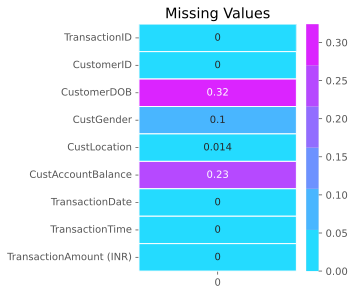

In [18]:
# check percentages of missing values
plt.figure(figsize=(12,10))
plt.subplot(231)
sns.heatmap(pd.DataFrame(data.isnull().sum()/data.shape[0]*100),annot=True,
            cmap=sns.color_palette("cool"),linewidth=1,linecolor="white")
plt.title("Missing Values")

In [19]:
data.shape

(1048567, 9)

In [20]:
# drop missing values columns as they have less than 1% missing values
data = data.dropna()

In [21]:
data.shape

(1041614, 9)

In [22]:
data.isnull().values.any()

False

### 2.5.2 Data Visualization

#### 2.5.2.1 Data Distribution

##### **Age**

In [23]:
import datetime as dt

In [24]:
data['Age']=2021-data.CustomerDOB.dt.year

In [25]:
data.Age.describe()

count   1,041,614.00
mean           39.56
std            47.46
min           -49.00
25%            29.00
50%            33.00
75%            39.00
max           221.00
Name: Age, dtype: float64

In [26]:
# we seem to have ages in the negatives and max of 221. 
# exclude these from plotting
temp = [x for x in data.Age if x > 0 and x < 100]

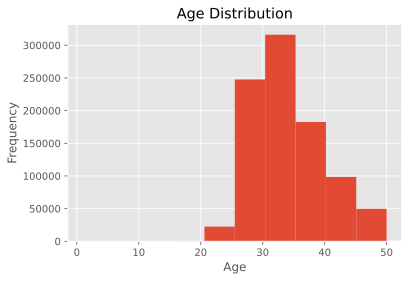

In [27]:
plt.hist(temp)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution")
plt.show()

##### **Gender**

In [28]:
data.CustGender.value_counts()

M    760978
F    280635
T         1
Name: CustGender, dtype: int64

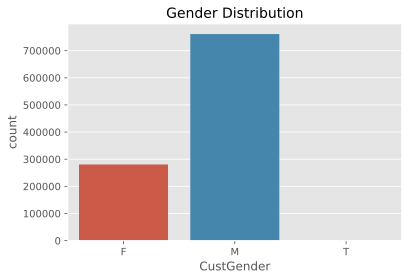

In [29]:
sns.countplot(data.CustGender)
plt.title('Gender Distribution', fontdict={'size':14});

##### **Location**

In [30]:
data.CustLocation.value_counts()

MUMBAI                           101997
NEW DELHI                         84143
BANGALORE                         81330
GURGAON                           73594
DELHI                             70549
                                  ...  
AL WAKRA                              1
MADINA HOTEL PUNE                     1
VILLAGE BEGUR HOBLI BANGALORE         1
KUKATPALLY HYDEABAD                   1
RAHON                                 1
Name: CustLocation, Length: 9275, dtype: int64

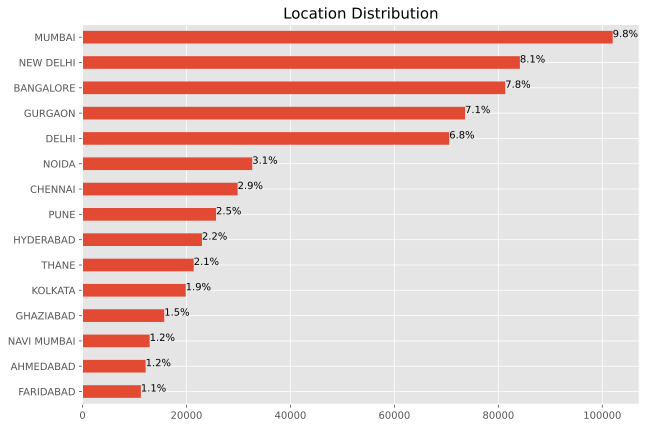

In [31]:
# top 15
ax = data.CustLocation.value_counts().head(15).sort_values().plot(kind = 'barh', figsize=(10,7))
plt.title('Location Distribution', fontdict={'size': 15})
for p in ax.patches:
  percentage ='{:,.1f}%'.format((p.get_width()/data.shape[0])*100)
  width, height =p.get_width(),p.get_height()
  x=p.get_x()+width+0.02
  y=p.get_y()+height/2
  ax.annotate(percentage,(x,y))

**Geolocation**

In [32]:
locations = list(data.CustLocation.value_counts().index)

In [33]:
# import geopandas as gpd

# from urllib import request
# from geotext import GeoText

from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

from shapely.geometry import Point, Polygon
import descartes

In [34]:
# geolocator = Nominatim(timeout=2)

# lat_lon = []
# for city in locations: 
#   try:
#     location = geolocator.geocode(city)
#     if location:
#       # print(location.latitude, location.longitude)
#       lat_lon.append(location)
#   except GeocoderTimedOut as e:
#     print("Error: geocode failed on input %s with message %s"%(city, e))
# # lat_lon

In [35]:
# df = pd.DataFrame(lat_lon, columns=['Location', 'Coordinates'])
# df.head(7)

In [36]:
# geometry = [Point(x[1], x[0]) for x in df['Coordinates']]
# geometry[:7]

In [37]:
# ## coordinate system I'm using
# crs = {'init': 'epsg:4326'}

# ## convert df to geo df
# geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)
# geo_df.head()

In [38]:
# ## world map .shp file I downloaded
# countries_map =gpd.read_file('Countries_WGS84/
#                               Countries_WGS84.shp')

# f, ax = plt.subplots(figsize=(16, 16))
# countries_map.plot(ax=ax, alpha=0.4, color='grey')
# geo_df['geometry'].plot(ax=ax, markersize = 30, 
#                         color = 'b', marker = '^', alpha=.2)

##### **Account Balance**

In [39]:
data.CustAccountBalance.describe()

count     1,041,614.00
mean        114,998.61
std         846,760.94
min               0.00
25%           4,728.14
50%          16,768.52
75%          57,428.85
max     115,035,495.10
Name: CustAccountBalance, dtype: float64

Text(0.5, 1.0, 'Account Balance')

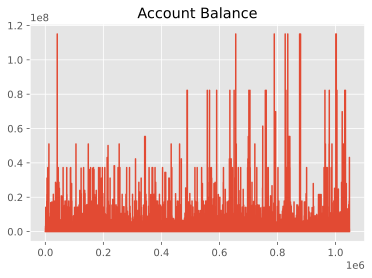

In [40]:
data.CustAccountBalance.plot()
plt.title("Account Balance")

##### **Transaction Amount**

In [41]:
data['TransactionAmount (INR)'].describe()

count   1,041,614.00
mean        1,566.10
std         6,561.46
min             0.00
25%           160.00
50%           457.50
75%         1,200.00
max     1,560,034.99
Name: TransactionAmount (INR), dtype: float64

In [42]:
data['Year'] = data.TransactionDate.dt.year
data['Month'] = data.TransactionDate.dt.month
data['Day'] = data.TransactionDate.dt.day
data['Week'] = data.TransactionDate.dt.isocalendar().week
data['Dayofweek'] = data.TransactionDate.dt.weekday

In [43]:
data.Year.value_counts()

2016    1041614
Name: Year, dtype: int64

Text(0.5, 1.0, 'Transaction Amount per Year')

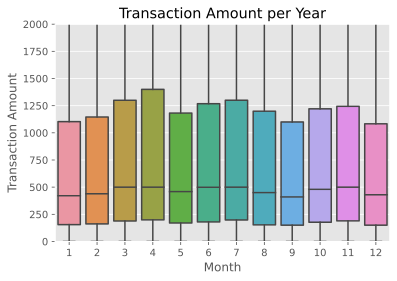

In [44]:
sns.boxplot(x = data['Month'], y = data['TransactionAmount (INR)'])
plt.xlabel('Month')
plt.ylabel('Transaction Amount')
plt.ylim([0, 2000])
plt.title('Transaction Amount per Year')

Text(0.5, 1.0, 'Transaction Amount per Day')

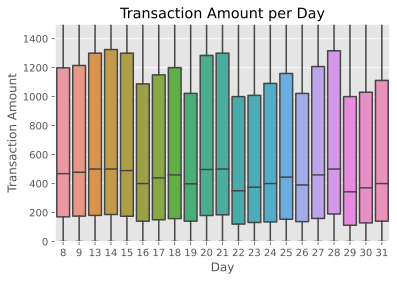

In [45]:
sns.boxplot(x = data['Day'], y = data['TransactionAmount (INR)'])
plt.xlabel('Day')
plt.ylabel('Transaction Amount')
plt.ylim([0, 1500])
plt.title('Transaction Amount per Day')

## 2.6 Normalization, scaling and transformation of data.


### 2.6.1 Data Encoding

In [46]:
data_obj_cols = [col for col in data.columns if  data[col].dtype=='O']

In [47]:
data[data_obj_cols].head(3)

TransactionID CustomerID CustGender CustLocation
0            T1   C5841053          F   JAMSHEDPUR
1            T2   C2142763          M      JHAJJAR
2            T3   C4417068          F       MUMBAI

#### Gender

In [48]:
data.CustGender.value_counts()

M    760978
F    280635
T         1
Name: CustGender, dtype: int64

In [49]:
# drop T
indexName = data[data.CustGender == 'T'].index
data.drop(indexName, inplace=True)

In [50]:
data.CustGender.value_counts()

M    760978
F    280635
Name: CustGender, dtype: int64

In [51]:
data['CustGender'] = data['CustGender'].map(lambda x: 1 if x == 'F' else 0)

#### Location

In [52]:
data.CustLocation.value_counts()

MUMBAI                           101997
NEW DELHI                         84143
BANGALORE                         81330
GURGAON                           73594
DELHI                             70549
                                  ...  
AL WAKRA                              1
MADINA HOTEL PUNE                     1
VILLAGE BEGUR HOBLI BANGALORE         1
KUKATPALLY HYDEABAD                   1
RAHON                                 1
Name: CustLocation, Length: 9275, dtype: int64

In [53]:
locations = data.CustLocation.unique()
locations = {place : idx for idx, place in enumerate(locations)}
data['CustLocation'] = data['CustLocation'].map(locations)

In [54]:
data.head(3)

TransactionID CustomerID CustomerDOB  CustGender  CustLocation  \
0            T1   C5841053  1994-10-01           1             0   
1            T2   C2142763  2057-04-04           0             1   
2            T3   C4417068  1996-11-26           1             2   

   CustAccountBalance TransactionDate  TransactionTime  \
0           17,819.05      2016-02-08           143207   
1            2,270.69      2016-02-08           141858   
2           17,874.44      2016-02-08           142712   

   TransactionAmount (INR)  Age  Year  Month  Day  Week  Dayofweek  
0                    25.00   27  2016      2    8     6          0  
1                27,999.00  -36  2016      2    8     6          0  
2                   459.00   25  2016      2    8     6          0

### 2.6.2 Transforming data

In [55]:
# we noticed earlier there were ages in the negatives and max of 221
temp = [x for x in data.Age if x < 1 or x > 100]
len(temp)

123669

In [56]:
# let's see if we can clean some of this data
temp_df = data[data['Age'].isin(temp)]
temp_df[['CustomerDOB','Age']]

CustomerDOB  Age
1        2057-04-04  -36
15       2068-10-07  -47
16       1800-01-01  221
22       1800-01-01  221
28       1800-01-01  221
...             ...  ...
1048510  2048-07-15  -27
1048531  1800-01-01  221
1048533  1800-01-01  221
1048536  2033-05-10  -12
1048540  1800-01-01  221

[123669 rows x 2 columns]

In [57]:
# let's check percentage of columns with wrong CustomerDOB inputs
len(temp) / data.shape[0] * 100

11.872835688494671

In [58]:
data.shape

(1041613, 15)

In [59]:
# drop these columns since we want to predict customer groups as accurately as possivle
indexNames = data[data.Age.isin(temp)].index
data.drop(indexNames, inplace=True)

In [60]:
data.shape

(917944, 15)

#### 2.6.2.1 Feature Engineering

##### **Days since transaction (Recency)**

In [61]:
data['DaysSinceTransaction'] = (pd.to_datetime('today') - data['TransactionDate'])/np.timedelta64(1, 'D')
data['DaysSinceTransaction'] = data['DaysSinceTransaction'] - data['DaysSinceTransaction'].min()

##### **Transaction Frequency**

In [62]:
df = data[['CustomerID', 'TransactionID']].groupby(by = 'CustomerID', as_index = False, sort = False).count().reset_index()

In [63]:
df = df.drop(columns = 'index')
df.rename(columns = {'TransactionID' : 'TransactionFrequency'})
data = data.merge(right = df, on = 'CustomerID')

In [64]:
data = data.rename(columns = {'TransactionID_y' : 'TransactionFrequency',
                         'DaysSinceTransaction' : 'Recency'})

##### **Customer Age at Transaction**

In [65]:
data['CustomerAge_atTxn']=data.TransactionDate.dt.year-data.CustomerDOB.dt.year

##### **Transaction Amount over Account Balance**

In [66]:
data['Amount_percentage_of_Balance'] = data['TransactionAmount (INR)'] / data['CustAccountBalance']

##### **Transaction Time**

In [67]:
from datetime import datetime

In [68]:
data['TransactionTime'] = data['TransactionTime'].apply(lambda x : datetime.utcfromtimestamp(int(x)).strftime('%H:%M:%S'))

In [69]:
data['TransactionHour'] = data['TransactionTime'].apply(lambda x : x.split(":")[0])
data['TransactionSeconds'] = data['TransactionTime'].apply(lambda x : x.split(":")[1])

In [70]:
data.head()

TransactionID_x CustomerID CustomerDOB  CustGender  CustLocation  \
0              T1   C5841053  1994-10-01           1             0   
1              T3   C4417068  1996-11-26           1             2   
2              T4   C5342380  1973-09-14           1             2   
3         T391139   C5342380  1979-05-29           0             2   
4              T5   C9031234  1988-03-24           1             3   

   CustAccountBalance TransactionDate TransactionTime  \
0           17,819.05      2016-02-08        15:46:47   
1           17,874.44      2016-02-08        15:38:32   
2          866,503.21      2016-02-08        15:38:34   
3            3,195.78      2016-08-13        05:55:48   
4            6,714.43      2016-02-08        02:19:16   

   TransactionAmount (INR)  Age  Year  Month  Day  Week  Dayofweek  Recency  \
0                    25.00   27  2016      2    8     6          0   305.00   
1                   459.00   25  2016      2    8     6          0   305.00   
2                 2,060.00   48  2016      2    8     6          0   305.00   
3                   878.40   42  2016      8   13    32          5   118.00   
4                 1,762.50   33  2016      2    8     6          0   305.00   

   TransactionFrequency  CustomerAge_atTxn  Amount_percentage_of_Balance  \
0                     1                 22                          0.00   
1                     1                 20                          0.03   
2                     2                 43                          0.00   
3                     2                 37                          0.27   
4                     1                 28                          0.26   

  TransactionHour TransactionSeconds  
0              15                 46  
1              15                 38  
2              15                 38  
3              05                 55  
4              02                 19

#### 2.6.2.2 Dropping Irrelevant Data Entries

In [71]:
# drop transaction id, customer DOB, transaction date, 
# transaction year (all transactions were made in 2016) and transaction time
data = data.drop(['TransactionID_x', 'CustomerID','CustomerDOB','TransactionDate','TransactionTime','Year','CustLocation'], axis = 1)

In [72]:
data.shape

(917944, 14)

#### 2.6.2.3 Renaming Columns

In [73]:
data.rename(columns = {'CustGender' : 'Gender',
                       'CustAccountBalance':'AccountBalance',
                       'TransactionAmount (INR)' : 'TransactionAmount',
                       'Month':'TransactionMonth',
                       'Day':'TransactionDay',
                       'Week':'TransactionWeek',
                       'Dayofweek':'TransactionDayofweek',
                       'Amount_percentage_of_Balance':'Transaction_percentage_of_Balance',
                      }, inplace=True)

#### 2.6.2.3 Data Types

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 917944 entries, 0 to 917943
Data columns (total 14 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             917944 non-null  int64  
 1   AccountBalance                     917944 non-null  float64
 2   TransactionAmount                  917944 non-null  float64
 3   Age                                917944 non-null  int64  
 4   TransactionMonth                   917944 non-null  int64  
 5   TransactionDay                     917944 non-null  int64  
 6   TransactionWeek                    917944 non-null  UInt32 
 7   TransactionDayofweek               917944 non-null  int64  
 8   Recency                            917944 non-null  float64
 9   TransactionFrequency               917944 non-null  int64  
 10  CustomerAge_atTxn                  917944 non-null  int64  
 11  Transaction_percentage_of_Balance  9179

In [75]:
data['TransactionHour'] = data['TransactionHour'].astype(float)
data['TransactionSeconds'] = data['TransactionSeconds'].astype(float)

#### 2.6.2.4 Missing and Infinity Values

In [76]:
data.isnull().values.any()

True

In [77]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [78]:
data.isnull().sum()

Gender                                  0
AccountBalance                          0
TransactionAmount                       0
Age                                     0
TransactionMonth                        0
TransactionDay                          0
TransactionWeek                         0
TransactionDayofweek                    0
Recency                                 0
TransactionFrequency                    0
CustomerAge_atTxn                       0
Transaction_percentage_of_Balance    1663
TransactionHour                         0
TransactionSeconds                      0
dtype: int64

In [79]:
data.shape

(917944, 14)

In [80]:
data = data.dropna()

In [81]:
data.isnull().values.any()

False

In [82]:
data.shape

(916281, 14)

### 2.6.3 Normalization

In [83]:
data.columns

Index(['Gender', 'AccountBalance', 'TransactionAmount', 'Age',
       'TransactionMonth', 'TransactionDay', 'TransactionWeek',
       'TransactionDayofweek', 'Recency', 'TransactionFrequency',
       'CustomerAge_atTxn', 'Transaction_percentage_of_Balance',
       'TransactionHour', 'TransactionSeconds'],
      dtype='object')

In [84]:
# drop Age, remain with 'customer age at transaction'
data = data.drop(['Age'], axis = 1)

There are over 900,000 data entries which will take way too much time and may not finish running. I'm going to just take a sample as KMeans explodes with n

In [85]:
# get sample subset
sample_10000 = data.sample(n=10000)

In [86]:
sample_10000.shape

(10000, 13)

In [87]:
# plotting distributions
def distributions(df):
    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5,1, figsize=(8,8))
    sns.distplot(df["AccountBalance"], ax=ax1)
    sns.distplot(df["TransactionAmount"], ax=ax2)
    sns.distplot(df["Recency"], ax=ax3)
    sns.distplot(df["CustomerAge_atTxn"], ax=ax4)
    sns.distplot(df["Transaction_percentage_of_Balance"], ax=ax5)
    plt.tight_layout()

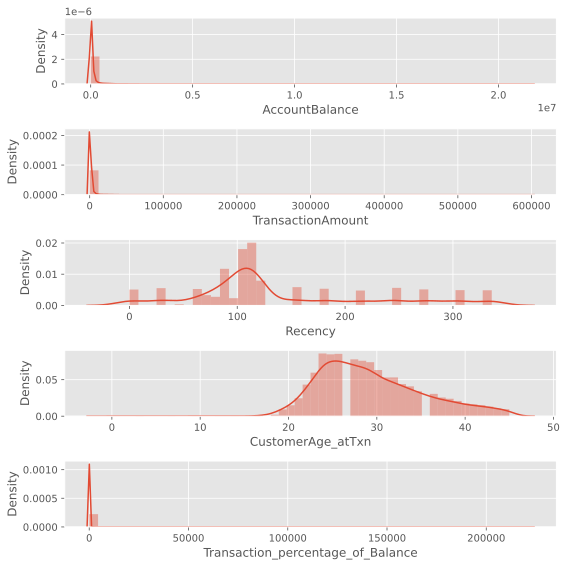

In [88]:
distributions(sample_10000)

Some distributions are right-skewed. To obtain better results we should remove the skewness

In [89]:
# Apply a power transform featurewise to make data more Gaussian-like
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson') 
X_power=pt.fit_transform(sample_10000)
df=pd.DataFrame(X_power,columns=sample_10000.columns)

### 2.6.4 Scaling

In [90]:
from sklearn.preprocessing import StandardScaler

In [91]:
scaler = StandardScaler()

In [92]:
cluster_scaled = scaler.fit_transform(df)

# 3.0 Creation of models

## 3.1 Clustering with KMeans

### 3.1.1 Training of the model

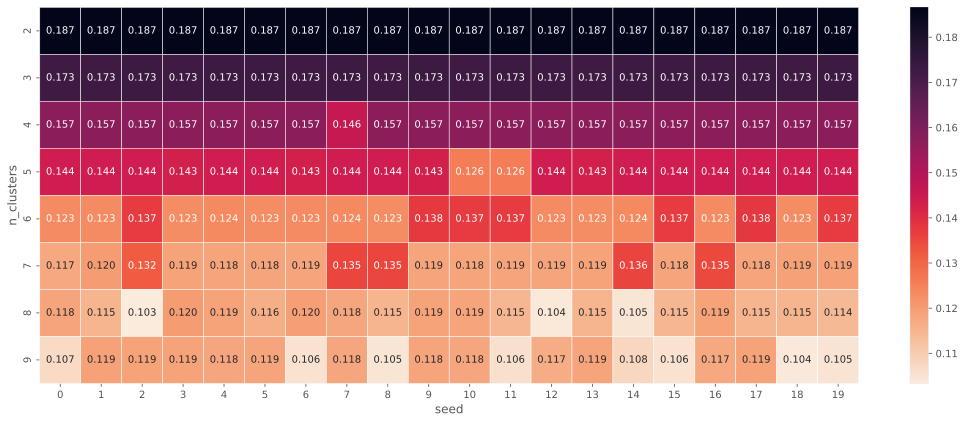

In [93]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

clusters_range = range(2,10)
random_range = range(0,20)
results =[]
for c in clusters_range:
    for r in random_range:
        clusterer = KMeans(n_clusters=c, random_state=r)
        cluster_labels = clusterer.fit_predict(cluster_scaled)
        silhouette_avg = silhouette_score(cluster_scaled, cluster_labels)
        results.append([c,r,silhouette_avg])

result = pd.DataFrame(results, columns=["n_clusters","seed","silhouette_score"])
pivot_km = pd.pivot_table(result, index="n_clusters", columns="seed",values="silhouette_score")

plt.figure(figsize=(15,6))
sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm.rocket_r)
plt.tight_layout()

### 3.1.2 Evaluating the model

The heatmap above shows silhouette scores for various combinations of random state and number of clusters. The highest scores are for 2 and 3 clusters and they are relatively insensitive to seed.

In [94]:
result1 = result

In [95]:
result1.groupby(by = 'n_clusters').agg({'silhouette_score' : 'mean'})

silhouette_score
n_clusters                  
2                       0.19
3                       0.17
4                       0.16
5                       0.14
6                       0.13
7                       0.12
8                       0.11
9                       0.11

## 3.2 Mini-Batch K-Means clustering and GaussianMixture

In [96]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.compose import ColumnTransformer
from sklearn.mixture import GaussianMixture
import matplotlib.cm as cm

In [97]:
df.columns

Index(['Gender', 'AccountBalance', 'TransactionAmount', 'TransactionMonth',
       'TransactionDay', 'TransactionWeek', 'TransactionDayofweek', 'Recency',
       'TransactionFrequency', 'CustomerAge_atTxn',
       'Transaction_percentage_of_Balance', 'TransactionHour',
       'TransactionSeconds'],
      dtype='object')

In [98]:
ct = ColumnTransformer([('Standard Scaling', scaler, 
                    ['AccountBalance', 'TransactionAmount',
                    'CustomerAge_atTxn', 'Recency','TransactionFrequency','Transaction_percentage_of_Balance'])], remainder = 'passthrough')

clusters = range(2, 8)
X = df
X = ct.fit_transform(X)

In [99]:
# Allows for assessment of cluster separations, and fitting of each observation in its own cluster. 
from sklearn.metrics import silhouette_samples, silhouette_score

In [100]:
def plt_silhouette(clusters, clusterer):
    results =[]
    #from sklearn : https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
    for cluster in clusters:
        fig, ax = plt.subplots(1, 1, figsize = (10, 10))

        ax.set_xlim([0, 1])
        ax.set_ylim([0, len(X) + (cluster + 1) * 10])
        
        if clusterer == MiniBatchKMeans:
            md = MiniBatchKMeans(n_clusters = cluster)
            preds = md.fit_predict(X)
            md_name = 'MiniBatchKMeans'
        else:
            md = GaussianMixture(n_components = cluster)
            preds = md.fit_predict(X)
            md_name = 'GaussianMixture'
        
        sil_average = silhouette_score(X, preds)
        print(f'For {cluster} clusters,\n the average silhouette score is {sil_average}')
        sample_sil = silhouette_samples(X, preds)
        y_lower = 10

        results.append([cluster,sil_average])

        for i in range(cluster):
            cluster_sil = sample_sil[preds == i]
            cluster_sil.sort()
            size_cluster = cluster_sil.shape[0]
            y_upper = y_lower + size_cluster
            color = cm.nipy_spectral(float(i) / cluster)
            ax.fill_betweenx(np.arange(y_lower, y_upper),
                            0,
                            cluster_sil,
                            facecolor = color,
                            edgecolor = color)
            ax.text(-0.05, y_lower + 0.5 * size_cluster, str(i))
            y_lower = y_upper + 10
            ax.axvline(x = sil_average, color = 'red', linestyle = '--')
            ax.set_yticks([])
            ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
            ax.set_title(f'Silhouette analysis using {md_name} for {cluster} clusters', fontweight = 'bold')

    return results

### 3.2.1 Models evaluation and Visualizing Clusters

For 2 clusters,
 the average silhouette score is 0.1866167832896264
For 3 clusters,
 the average silhouette score is 0.16123321553110895
For 4 clusters,
 the average silhouette score is 0.11765587456139756
For 5 clusters,
 the average silhouette score is 0.11500248754159013
For 6 clusters,
 the average silhouette score is 0.12429124200437364
For 7 clusters,
 the average silhouette score is 0.10033105733188862


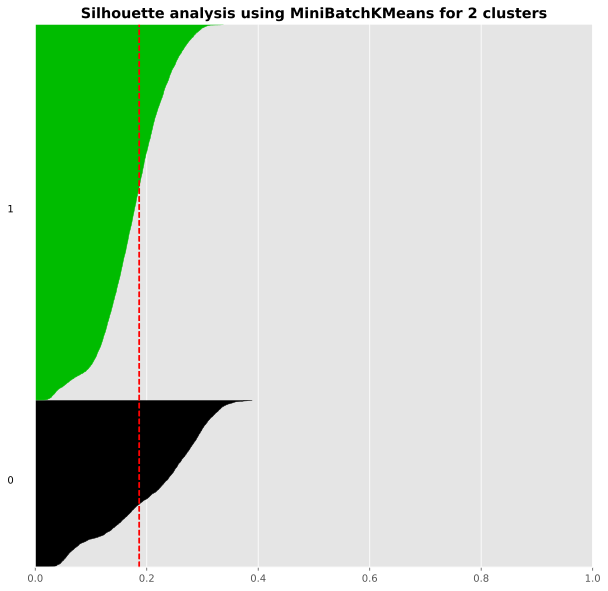

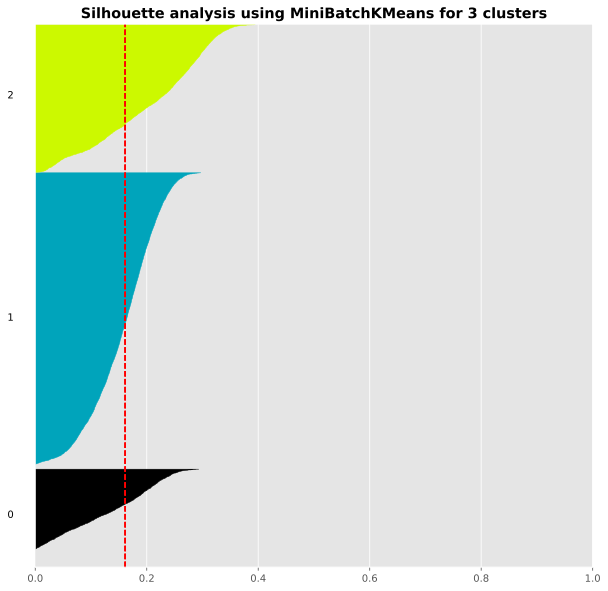

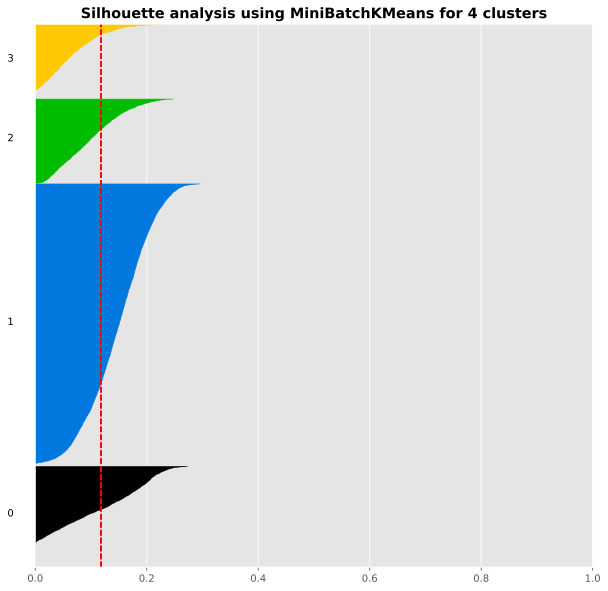

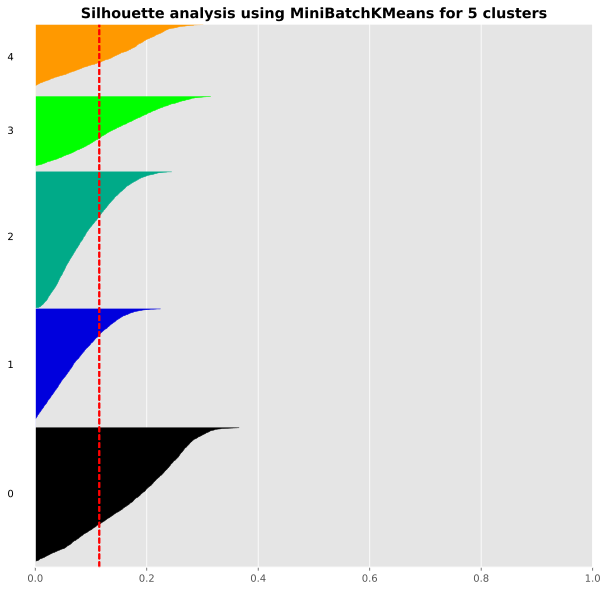

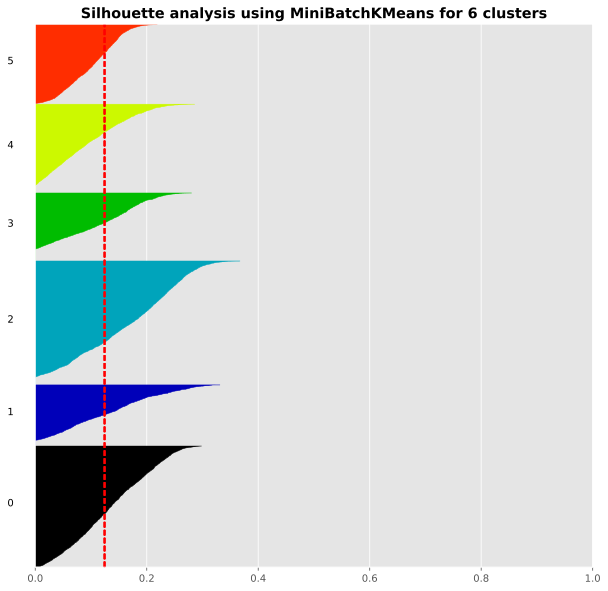

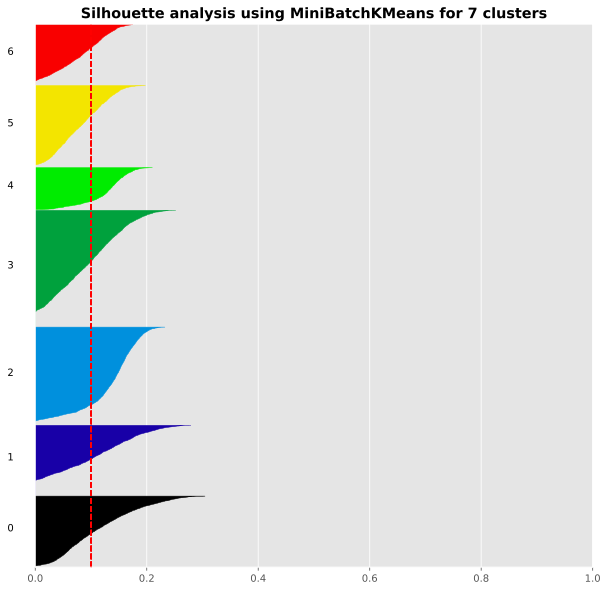

In [101]:
results2 = plt_silhouette(clusters, MiniBatchKMeans)

In [102]:
result2 = pd.DataFrame(results2, columns=["n_clusters","silhouette_score"])

In [103]:
result2.groupby(by = 'n_clusters').agg({'silhouette_score' : 'mean'})

silhouette_score
n_clusters                  
2                       0.19
3                       0.16
4                       0.12
5                       0.12
6                       0.12
7                       0.10

For 2 clusters,
 the average silhouette score is 0.15498176872642885
For 3 clusters,
 the average silhouette score is 0.1181072533311277
For 4 clusters,
 the average silhouette score is 0.096510644425957
For 5 clusters,
 the average silhouette score is 0.10150338481168633
For 6 clusters,
 the average silhouette score is 0.07713228447677041
For 7 clusters,
 the average silhouette score is 0.07035502513142583


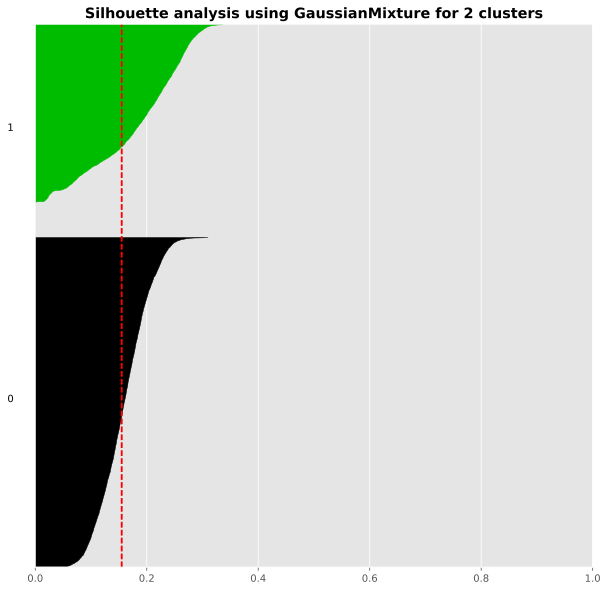

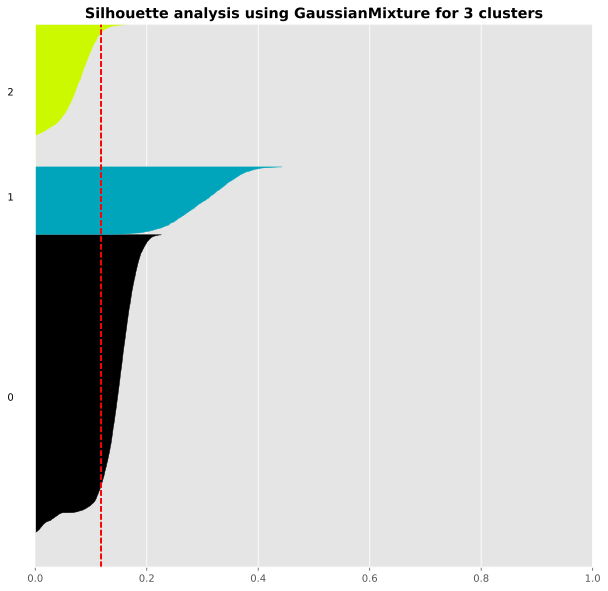

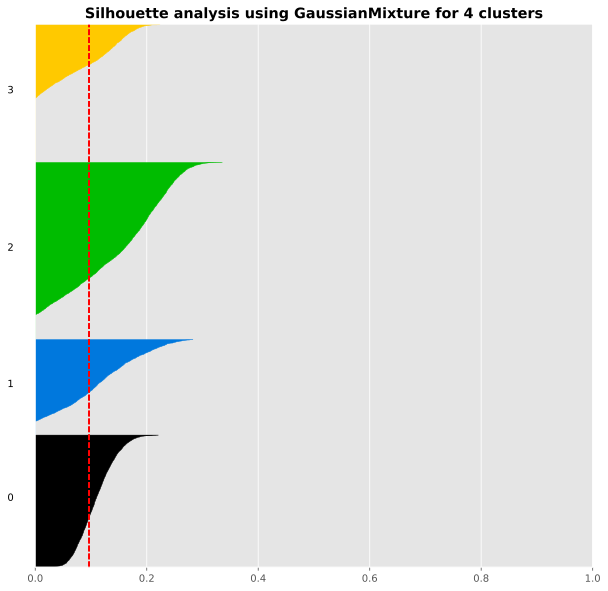

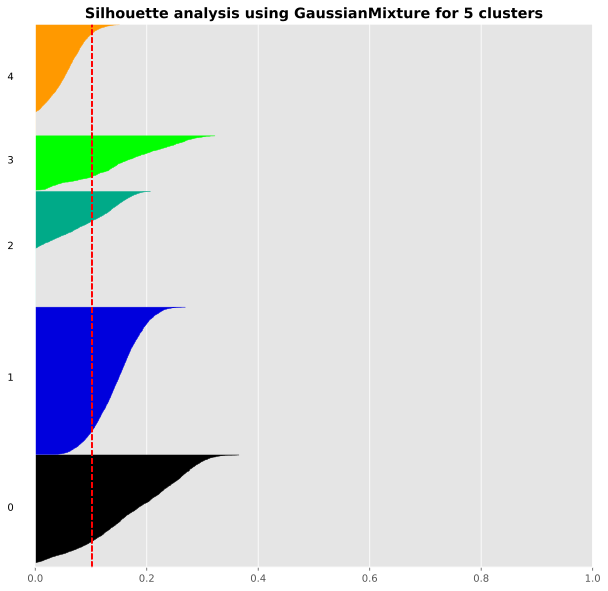

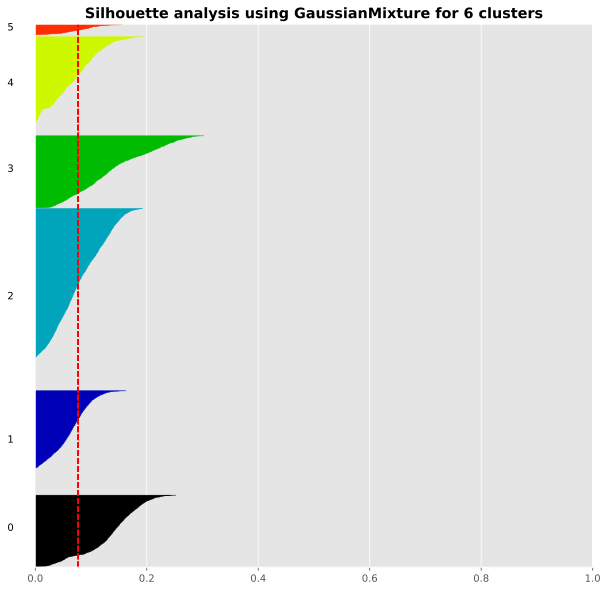

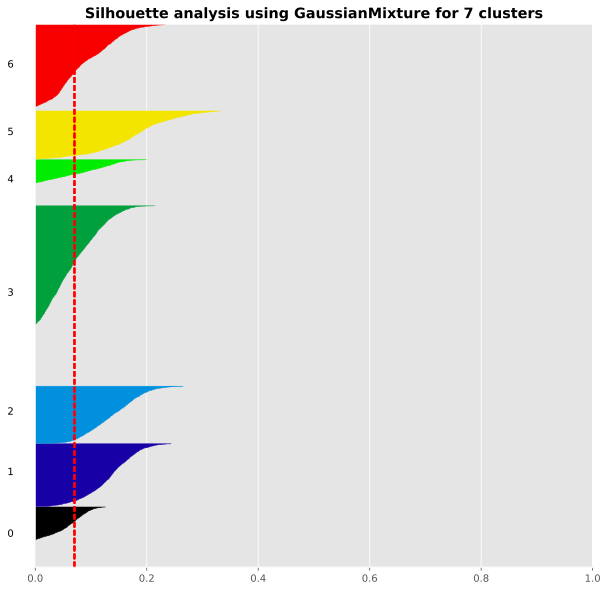

In [104]:
result3 = plt_silhouette(clusters, GaussianMixture)

In [105]:
result3 = pd.DataFrame(result3, columns=["n_clusters","silhouette_score"])

In [106]:
result3.groupby(by = 'n_clusters').agg({'silhouette_score' : 'mean'})

silhouette_score
n_clusters                  
2                       0.15
3                       0.12
4                       0.10
5                       0.10
6                       0.08
7                       0.07

In [107]:
result1

n_clusters  seed  silhouette_score
0             2     0              0.19
1             2     1              0.19
2             2     2              0.19
3             2     3              0.19
4             2     4              0.19
..          ...   ...               ...
155           9    15              0.11
156           9    16              0.12
157           9    17              0.12
158           9    18              0.10
159           9    19              0.11

[160 rows x 3 columns]

In [108]:
result1.rename(columns = {'silhouette_score' : 'KMeans'}, inplace=True)
result2.rename(columns = {'silhouette_score' : 'Mini-Batch K-Means'}, inplace=True)
result3.rename(columns = {'silhouette_score' : 'GaussianMixture'}, inplace=True)

In [109]:
result1 = result1.drop(['seed'], axis = 1)

In [110]:
df_merge = result1.merge(result2, on='n_clusters')
df_merge = df_merge.merge(result3, on='n_clusters')

In [111]:
temp = df_merge.groupby(by = 'n_clusters').mean()
temp

KMeans  Mini-Batch K-Means  GaussianMixture
n_clusters                                             
2             0.19                0.19             0.15
3             0.17                0.16             0.12
4             0.16                0.12             0.10
5             0.14                0.12             0.10
6             0.13                0.12             0.08
7             0.12                0.10             0.07

With Silhouette score, the groups should be of roughly equal sizes, and all of the clusters should have at least the average silhouette score.

In [112]:
temp['KMeans'].mean()

0.15157678435227875

In [113]:
temp['Mini-Batch K-Means'].mean()

0.13418844337666422

In [114]:
temp['GaussianMixture'].mean()

0.10309839348389936

# 4.0 Optimization techniques

We have a rough idea of how many clusters give the most optimum performance. However, there are some techniques that can optimize for us by giving us the number of clusters to consider.

## 4.1 K-Means++ 

First, we need to specify a procedure to initialize the cluster centers before moving forward with the standard k-means clustering algorithm.

Using the K-Means++ algorithm, we optimize the step where we randomly pick the cluster centroid. We are more likely to find a solution that is competitive to the optimal K-Means solution while using the K-Means++ initialization.

## 4.2 Inertia

The distance between clusters should be as low as possible

### 4.2.1 Checking how inertia changes for various number of clusters

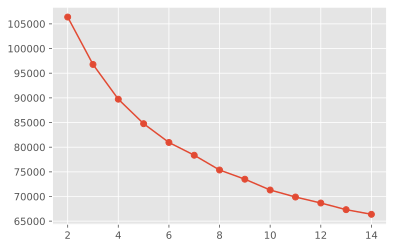

In [115]:
clusters_range = [2,3,4,5,6,7,8,9,10,11,12,13,14]
inertias =[]

for c in clusters_range:
    # apply k-means++
    kmeans = KMeans(n_clusters=c, random_state=0, init='k-means++').fit(cluster_scaled)
    inertias.append(kmeans.inertia_)

plt.figure()
plt.plot(clusters_range,inertias, marker='o')

The plot above shows that inertia decreases with increasing number of clusters. The cluster value where the decrease in inertia value becomes constant can be chosen as the right cluster value for our data. Here, we can choose any number of clusters between 6 and 10. We can have 7, 8, or even 9 clusters.

However, let's explore a more straightforward approach.

## 4.3 Elbow Method

To select the optimal number of clusters by fitting the model with a range of values for K

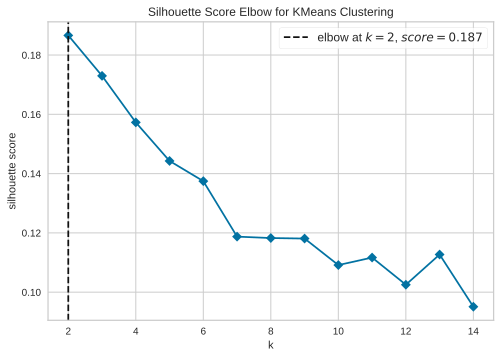

In [116]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15), metric='silhouette', timings=False)

visualizer.fit(cluster_scaled)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Let's explore one final approach.

## 4.4 Affinity Propagation

An algorithm that identifies exemplars among data points and forms clusters of data points around these exemplars. It means that we don’t define upfront number of clusters, algorithm itself chooses their number.

In [117]:
from sklearn.cluster import AffinityPropagation

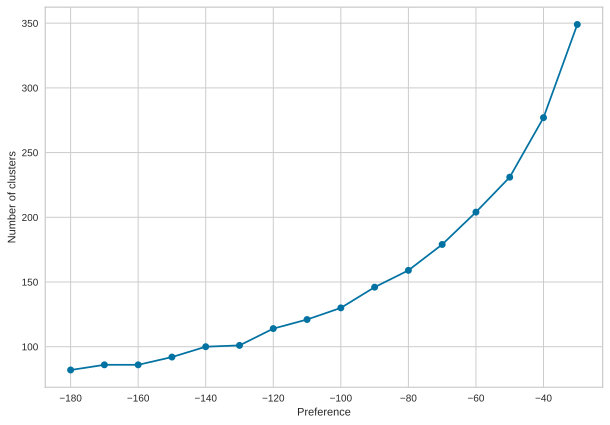

In [118]:
preferences = np.arange(-30,-190,-10)
clusters = []

# note that we do not pass the preferences as arguments which means that it will be set to the median of the input similarities.

for p in preferences:
  af = AffinityPropagation(preference=p, damping=0.6, max_iter=100, verbose=False).fit(cluster_scaled)
  labels_af = pd.DataFrame(af.labels_)
  clusters.append(len(af.cluster_centers_indices_))

plt.figure(figsize=(10,7))
plt.xlabel("Preference")
plt.ylabel("Number of clusters")
plt.plot(preferences,clusters, marker='o')

When preference parameter increases, clusters goes up as well, then dips down to zero, then picks up again.

Let's try to optimize KMeans hyperparameters since it gave us the highest scores.



## 4.5 n_init

(default: 10) 

It is a significant parameter used to define the number of initialization attempts for centroids of clusters. If the initialization is as intended this value can be increased to make more attempts to initialize the model with optimum centroids. 

Default value 10 usually produces good results. However, we will try with 20

## 4.6 max_iter

(default: 300)

The maximum number of iterations of the k-means algorithm for a single run. It basically determines how many different sets of randomly chosen centroids, should the algorithm use. 300 is pretty good without compromising too much computational efficiency.



In [119]:
clusterer = KMeans(n_clusters=2, init='k-means++', n_init=20, random_state=1234, max_iter=500, algorithm='elkan')
cluster_labels = clusterer.fit_predict(cluster_scaled)
silhouette_avg = silhouette_score(cluster_scaled, cluster_labels)
print(silhouette_avg)

0.1866167832896264


There is no much change even if we increase iterations or try with the other algorithms.

We will try one final step, to play around with different sample sizes.

In [120]:
# get sample subsets
sample_1000 = data.sample(n=1000)
sample_2500 = data.sample(n=2500)
sample_5000 = data.sample(n=5000)
sample_10000 = data.sample(n=10000)
sample_50000 = data.sample(n=50000)
sample_100000 = data.sample(n=100000)

In [121]:
# normalize data
def normalize(df):
  X_power=pt.fit_transform(df)
  return X_power

In [122]:
# scale data
def scale(df):
  cluster_scaled = scaler.fit_transform(df)
  return cluster_scaled

In [123]:
def model(cluster_scaled):
  clusterer = KMeans(n_clusters=2, init='k-means++')
  cluster_labels = clusterer.fit_predict(cluster_scaled)
  silhouette_avg = silhouette_score(cluster_scaled, cluster_labels)
  print(silhouette_avg)

In [124]:
# sample 1000
cluster_scaled = scale(normalize(sample_1000))
model(cluster_scaled)

0.18516988292516637


Slight increase in score

In [125]:
# sample 2500
cluster_scaled = scale(normalize(sample_2500))
model(cluster_scaled)

0.18803097047640394


In [126]:
# sample 5000
cluster_scaled = scale(normalize(sample_5000))
model(cluster_scaled)

0.18888130724167182


In [127]:
# sample 10000
cluster_scaled = scale(normalize(sample_10000))
model(cluster_scaled)

0.18962154070054754


In [128]:
# sample 50000
cluster_scaled = scale(normalize(sample_50000))
model(cluster_scaled)

0.1891514864593387


In [129]:
# sample 100000
cluster_scaled = scale(normalize(sample_100000))
model(cluster_scaled)

0.18902497844188543


Computational power is at stake here so let's wrap it up. 

The silhouette score of 1 means that the clusters are very dense and nicely separated. The score of 0 means that clusters are overlapping. The score of less than 0 means that data belonging to clusters may be wrong/incorrect. With 0.19, we can infer that our model performs relatively well. 

Perhaps there are huge variations in customers from different locations? India is very huge so maybe we mixed rural and urban customers. Let's proceed to make predictions with this model.

# 5.0 Make Predictions

KMeans with two clusters seem to be the best, having a signifcantly higher silhouette score, and while one cluster is significantly smaller than the other, this is probably due to the large imbalance in the frequency of transactions. Let's see what happens when we exclude the frequency

In [130]:
cluster_scaled = scale(normalize(sample_1000))

In [131]:
# k means using 2 and 3 clusters and k-means++ initialization
kmeans = KMeans(n_clusters = 2, init='k-means++', n_init=20)
kmeans.fit(cluster_scaled)
pred1 = kmeans.predict(cluster_scaled)

In [132]:
kmeans = KMeans(n_clusters = 3, init='k-means++', n_init=20)
kmeans.fit(cluster_scaled)
pred2 = kmeans.predict(cluster_scaled)

In [133]:
kmeans = KMeans(n_clusters = 4, init='k-means++', n_init=20)
kmeans.fit(cluster_scaled)
pred3 = kmeans.predict(cluster_scaled)

In [134]:
kmeans = KMeans(n_clusters = 5, init='k-means++', n_init=20)
kmeans.fit(cluster_scaled)
pred4 = kmeans.predict(cluster_scaled)

In [135]:
kmeans = KMeans(n_clusters = 6, init='k-means++', n_init=20)
kmeans.fit(cluster_scaled)
pred5 = kmeans.predict(cluster_scaled)

In [136]:
kmeans = KMeans(n_clusters = 7, init='k-means++', n_init=20)
kmeans.fit(cluster_scaled)
pred6 = kmeans.predict(cluster_scaled)

In [137]:
kmeans = KMeans(n_clusters = 8, init='k-means++', n_init=20)
kmeans.fit(cluster_scaled)
pred7 = kmeans.predict(cluster_scaled)

In [138]:
results = pd.DataFrame(sample_1000)
results['cluster_2'] = pred1
results['cluster_3'] = pred2
results['cluster_4'] = pred3
results['cluster_5'] = pred4
results['cluster_6'] = pred5
results['cluster_7'] = pred6
results['cluster_8'] = pred7

# 6.0 Visualize Results

In [139]:
def scatters(data, h=None, pal=None):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
    sns.scatterplot(x="AccountBalance",y="TransactionMonth", hue=h, palette=pal, data=data, ax=ax1)
    sns.scatterplot(x="CustomerAge_atTxn",y="TransactionAmount", hue=h, palette=pal, data=data, ax=ax2)
    sns.scatterplot(x="CustomerAge_atTxn",y="Recency", hue=h, palette=pal, data=data, ax=ax3)
    plt.tight_layout()

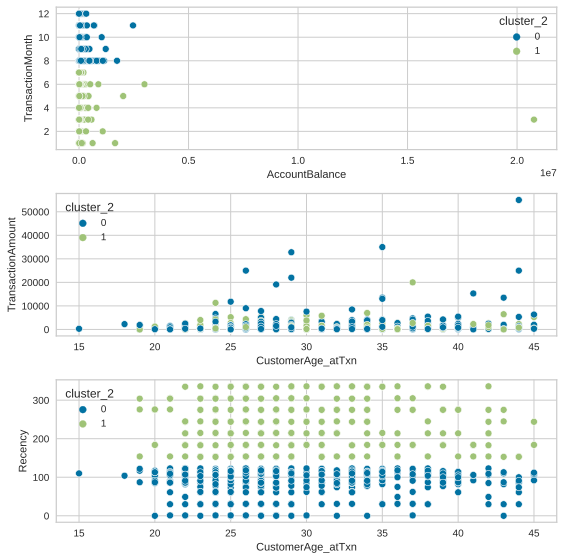

In [140]:
scatters(results,'cluster_2')

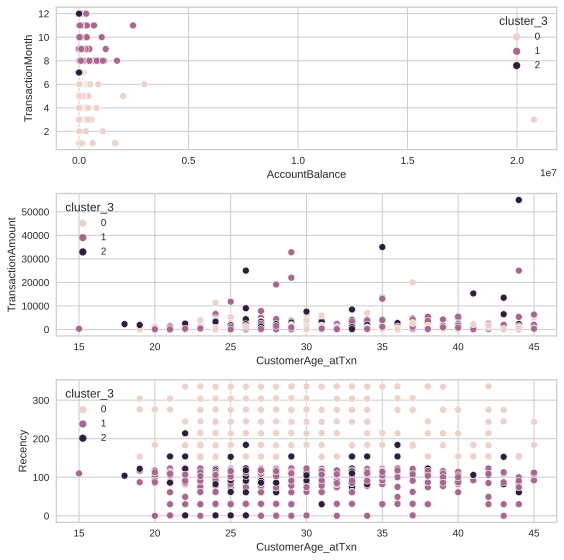

In [141]:
scatters(results,'cluster_3')

From the distributions of these clusters, while we can see 2 distinct clusters in recency and transaction month, the clusters in transaction amount seem pretty much similar. The 3 clusters option is more mixed up and perhaps a groups of cluster 3 can be seen in recency, while 1 and 2 are mixed up.

In [142]:
# characteristics of 2 clusters
cluster2_df = results.groupby(['cluster_2']).mean().round(1)
cluster2_df[['CustomerAge_atTxn','AccountBalance','TransactionAmount']]

CustomerAge_atTxn  AccountBalance  TransactionAmount
cluster_2                                                      
0                      28.90       68,420.30           1,161.10
1                      29.50      140,905.40             997.60

* Cluster 1 – middle-aged, high AccountBalance, lower TransactionAmount

* Cluster 2 - middle-aged, lower AccountBalance, higher TransactionAmount

In [143]:
# characteristics of 3 clusters
cluster3_df = results.groupby(['cluster_3']).mean().round(1)
cluster3_df[['CustomerAge_atTxn','AccountBalance','TransactionAmount']]

CustomerAge_atTxn  AccountBalance  TransactionAmount
cluster_3                                                      
0                      29.50      151,114.90             960.40
1                      29.20       84,064.50             924.60
2                      28.00        3,537.10           2,052.10

* Cluster 1 – middle-aged, low AccountBalance, higher TransactionAmount

* Cluster 2 - middle-aged, higher AccountBalance, lower TransactionAmount

* Cluster 2 - middle-aged, relatively high AccountBalance, low TransactionAmount

# 7.0 Model Deployment

In [149]:
results.head(3)

Gender  AccountBalance  TransactionAmount  TransactionMonth  \
328966       0       65,321.41           1,232.00                10   
257639       0          251.72           2,000.00                 7   
100205       1            8.83              30.00                 1   

        TransactionDay  TransactionWeek  TransactionDayofweek  Recency  \
328966               8               40                     5    62.00   
257639               8               27                     4   154.00   
100205               8                1                     4   336.00   

        TransactionFrequency  CustomerAge_atTxn  \
328966                     1                 37   
257639                     1                 22   
100205                     1                 25   

        Transaction_percentage_of_Balance  TransactionHour  \
328966                               0.02             7.00   
257639                               7.95             5.00   
100205                               3.40             7.00   

        TransactionSeconds  cluster_2  cluster_3  cluster_4  cluster_5  \
328966               45.00          0          1          1          0   
257639               35.00          1          2          3          3   
100205               47.00          1          0          0          1   

        cluster_6  cluster_7  cluster_8  
328966          0          3          1  
257639          5          2          2  
100205          1          1          6

In [150]:
# save data
sample_1000.to_csv('data.csv')
results.to_csv('results.csv')
!cp data.csv "/content/drive/My Drive/Y4_T1/Machine Learning/"
!cp results.csv "/content/drive/My Drive/Y4_T1/Machine Learning/"

In [151]:
import pickle

In [152]:
data = {"model": kmeans, "data":sample_1000, "results":results}
with open('kmeans_saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [153]:
!cp kmeans_saved_steps.pkl "/content/drive/My Drive/Y4_T1/Machine Learning/"